In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from wordcloud import WordCloud

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Pavan.M\Downloads\archive (2)\train.csv")

In [3]:
# Display number of spam and non-spam messages
spam_count = data['label'].sum()
non_spam_count = len(data) - spam_count
print(f"Number of spam messages: {spam_count}")
print(f"Number of non-spam messages: {non_spam_count}")

Number of spam messages: 747
Number of non-spam messages: 4827


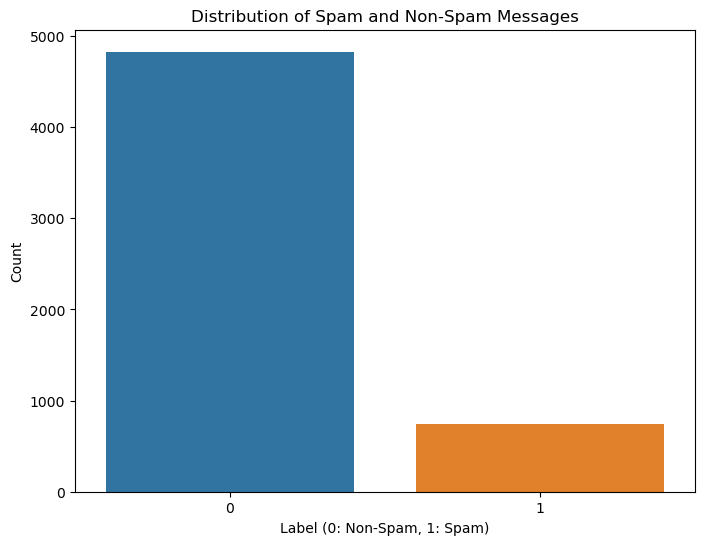

In [21]:
# Visualize the distribution of spam and non-spam messages
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Non-Spam Messages')
plt.xlabel('Label (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

In [4]:
# Prepare the data
X = data['sms']
y = data['label']

In [5]:
X

0       Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...\n
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570               Will ü b going to esplanade fr home?\n
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                         Rofl. Its true to its name\n
Name: sms, Length: 5574, dtype: object

In [6]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: label, Length: 5574, dtype: int64

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
vectorizer

CountVectorizer()

In [10]:
# Train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [12]:
# Make predictions
y_pred = model.predict(X_test_vec)

In [13]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9794
Precision: 0.9662
Recall: 0.8882
F1-score: 0.9256


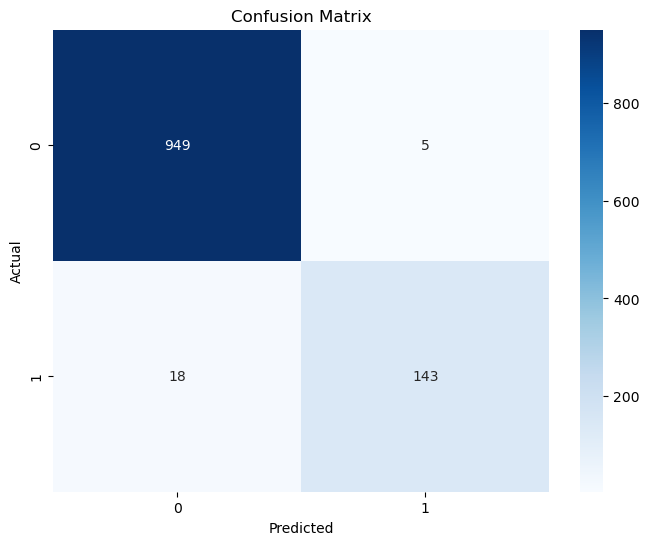

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

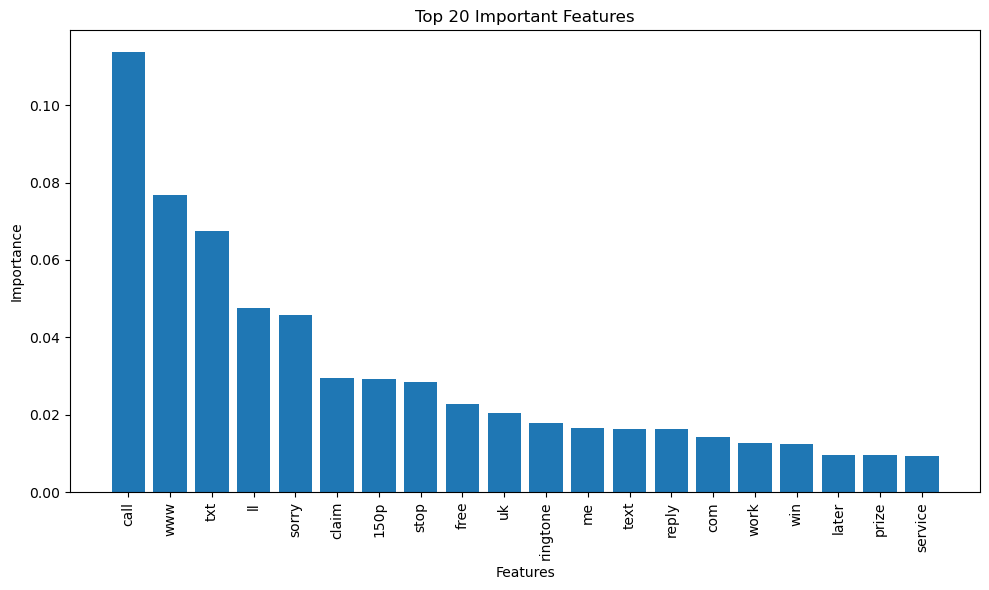

In [16]:
# Feature Importance
feature_importance = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_features = sorted(zip(feature_importance, feature_names), reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.bar([name for _, name in top_features], [importance for importance, _ in top_features])
plt.title('Top 20 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

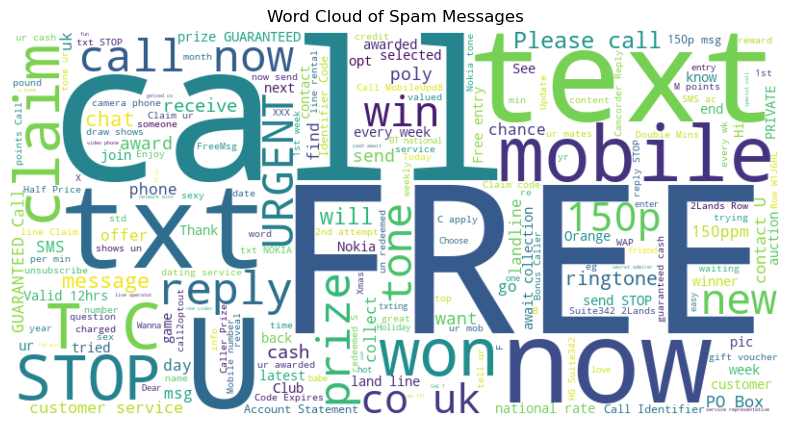

In [17]:
# Word Cloud for Spam Messages
spam_text = ' '.join(data[data['label'] == 1]['sms'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

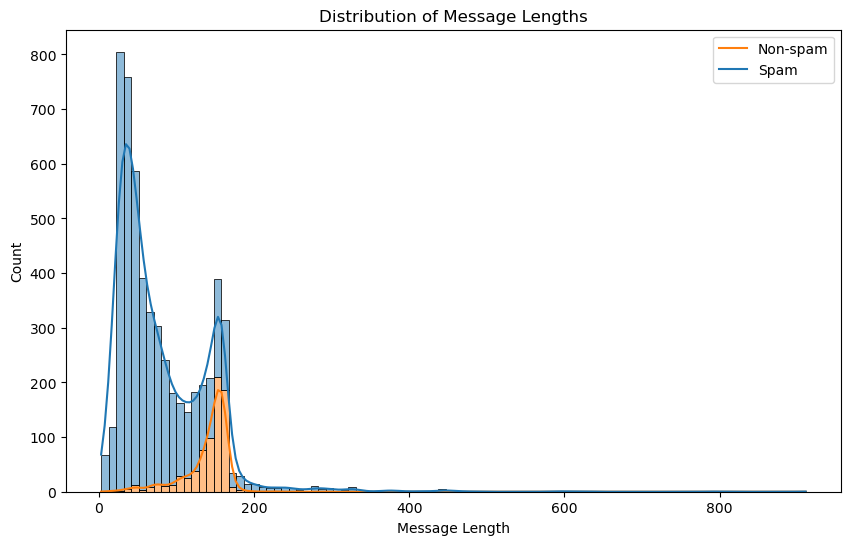

In [18]:
# Distribution of Message Lengths
data['message_length'] = data['sms'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='message_length', hue='label', kde=True, multiple='stack')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(labels=['Non-spam', 'Spam'])
plt.show()

In [19]:
# Example of classifying a new message
def classify_message(message):
    # Vectorize the new message
    message_vec = vectorizer.transform([message])
    
    # Predict using the trained model
    prediction = model.predict(message_vec)
    
    # Get prediction probability
    prob = model.predict_proba(message_vec)[0]
    
    # Interpret the result
    if prediction[0] == 1:
        result = "Spam"
        confidence = prob[1]
    else:
        result = "Not Spam"
        confidence = prob[0]
    
    return result, confidence

In [20]:
# Example usage
new_message1 = "Congratulations! You've won a free iPhone. Click here to claim your prize now!"
new_message2 = "Hi Mom, can you pick me up after school today?"

result1, confidence1 = classify_message(new_message1)
result2, confidence2 = classify_message(new_message2)

print(f"\nMessage 1: '{new_message1}'")
print(f"Classification: {result1}")
print(f"Confidence: {confidence1:.2f}")

print(f"\nMessage 2: '{new_message2}'")
print(f"Classification: {result2}")
print(f"Confidence: {confidence2:.2f}")


Message 1: 'Congratulations! You've won a free iPhone. Click here to claim your prize now!'
Classification: Spam
Confidence: 0.90

Message 2: 'Hi Mom, can you pick me up after school today?'
Classification: Not Spam
Confidence: 1.00
